<a href="https://colab.research.google.com/github/Nikhil141900/NikhilHyalij-YBI-Foundation/blob/main/Classification_Model_to_Identify_Multiple_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⭐ **Classification** **Model** **to** **Identify** **Multiple** **Disease**

In [ ]:
# import library
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# import data
disease = pd.read_csv('https://github.com/ybi-foundation/Dataset/raw/main/MultipleDiseasePrediction.csv')

In [ ]:
# view data
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
# info of data
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# summary statistics
disease.describe()

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [ ]:
# check for missing value
disease.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
# check for categories
disease.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

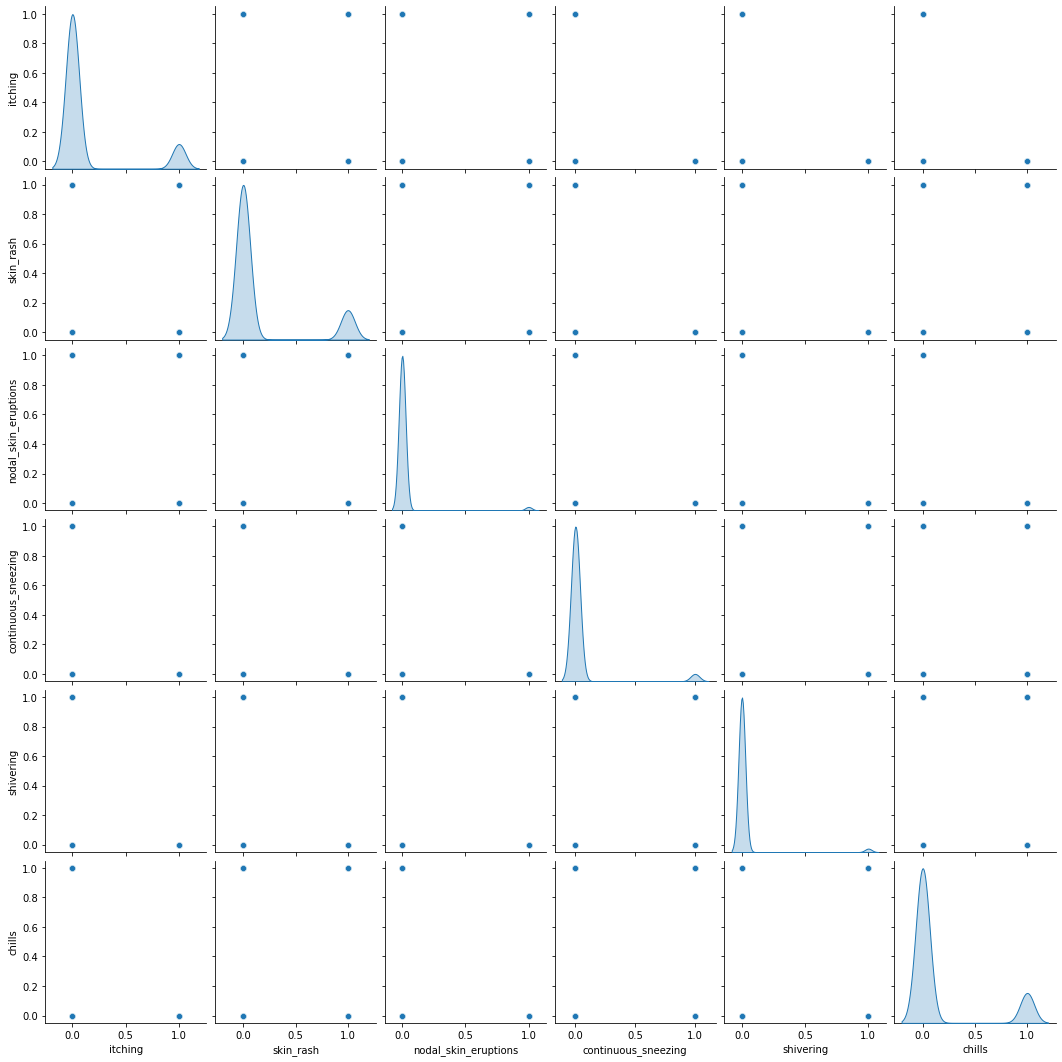

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# visualize pairplot
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
sns_plot = sns.pairplot(df,diag_kind='kde',height=2.5)
sns_plot.savefig("pairplot.png")

plt.clf()
Image(filename='pairplot.png')

In [ ]:
# correlation
corr_matrix = disease.corr()
corr_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [ ]:
# column names
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
# define y
y = disease['prognosis']

In [ ]:
# define X
X = disease[['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering',
             'chills','joint_pain','stomach_pain','acidity','ulcers_on_tongue',
             'muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue',
             'weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness',
             'lethargy','patches_in_throat','irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness',
             'sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','nausea',
             'loss_of_appetite','pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever',
             'yellow_urine','yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
             'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
             'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
             'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus',
             'neck_pain','dizziness','cramps','bruising','obesity','swollen_legs','swollen_blood_vessels',
             'puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger',
             'extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain',
             'muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements',
             'loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort',
             'foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
             'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
             'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria',
             'family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
             'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption',
             'fluid_overload','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples',
             'blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails','inflammatory_nails',
             'blister','red_sore_around_nose','yellow_crust_ooze']]


In [ ]:

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=3)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [ ]:
#select model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 

In [ ]:
#  train model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred=clf.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Step 8 : model accuracy 
accuracy_score(y_test,y_pred)

1.0

In [ ]:
# model confusion matrix
confusion_matrix(y_test,y_pred)

array([[35,  0,  0, ...,  0,  0,  0],
       [ 0, 35,  0, ...,  0,  0,  0],
       [ 0,  0, 34, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 42,  0,  0],
       [ 0,  0,  0, ...,  0, 37,  0],
       [ 0,  0,  0, ...,  0,  0, 42]])

In [ ]:
# model classification report
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        35
                                   AIDS       1.00      1.00      1.00        35
                                   Acne       1.00      1.00      1.00        34
                    Alcoholic hepatitis       1.00      1.00      1.00        34
                                Allergy       1.00      1.00      1.00        38
                              Arthritis       1.00      1.00      1.00        28
                       Bronchial Asthma       1.00      1.00      1.00        39
                   Cervical spondylosis       1.00      1.00      1.00        39
                            Chicken pox       1.00      1.00      1.00        32
                    Chronic cholestasis       1.00      1.00      1.00        44
                            Common Cold       1.00      1.00      1.00        35
                           

In [ ]:
# future prediction
X.sample()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
3257,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# define X_new
X_new = X.sample()
X_new.sample()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
3903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# predict for X_new
clf.predict(X_new)

array(['Gastroenteritis'], dtype=object)